In [246]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [247]:
# load iris dataset
data = pd.read_csv('Iris.csv')

In [248]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [250]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
print(data["Species"].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [252]:
data=data.drop(data[["Id"]],axis=1)

In [253]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [254]:
X = data.drop(columns=["Species"])
y = data.Species
class_names = np.unique(y)

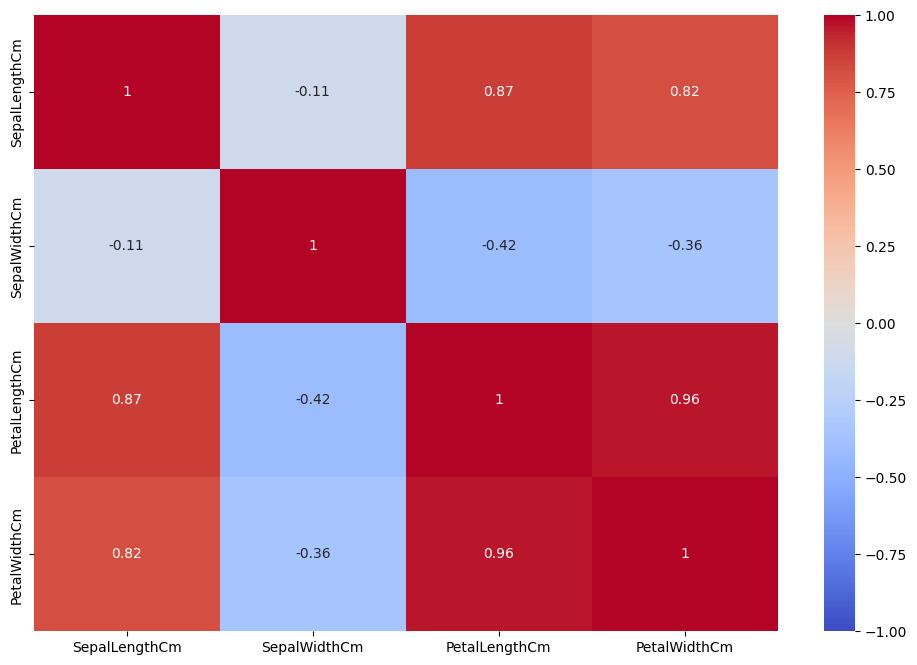

In [255]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [256]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [258]:
#Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [259]:
# Apply LDA for Dimensionality Reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [261]:
#Train the LDA Classifier
lda_classifier = LinearDiscriminantAnalysis(n_components=2)
lda_classifier.fit(X_train_scaled, y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,2
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [262]:
y_pred = lda_classifier.predict(X_test_scaled) #prediction

In [263]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [238]:
# -------------------------------
# 2. Select columns for 3D plot
# -------------------------------
x = data["SepalLengthCm"]
y = data["SepalWidthCm"]
z = data["PetalLengthCm"]

labels = data["Species"]

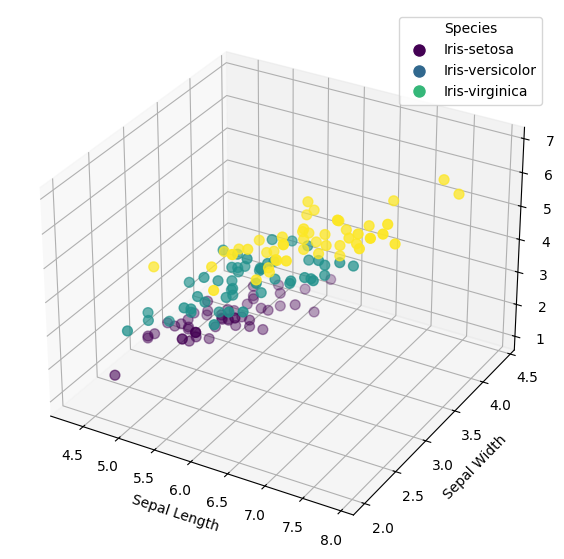

In [239]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=pd.factorize(labels)[0], s=50)

# Labels
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")

# Legend
species_names = pd.unique(labels)
legend_handles = []
for i, species in enumerate(species_names):
    legend_handles.append(
        plt.Line2D([0], [0], marker='o', color='w',
                   label=species, markerfacecolor=scatter.cmap(i/3), markersize=10)
    )

ax.legend(handles=legend_handles, title="Species")
plt.show()

In [264]:
# -------------------------------------
# 6. Explained Variance (LDA components)
# -------------------------------------
print("\n=== Explained Variance Ratio ===")
print(lda.explained_variance_ratio_)


=== Explained Variance Ratio ===
[0.99073433 0.00926567]


In [265]:
lda.coef_   #feature importance

array([[  5.7386618 ,   4.97698245, -30.94258256, -15.60940116],
       [ -1.51601639,  -1.73166201,   8.64644167,   1.94803166],
       [ -4.22264541,  -3.24532044,  22.29614089,  13.66136951]])

In [266]:
lda.means_ #mean value of each original feature for each class in the LDA-transformed space

array([[-1.02298939,  0.80740532, -1.30158198, -1.25114722],
       [ 0.10548334, -0.66282344,  0.27366838,  0.15228499],
       [ 0.91750605, -0.14458188,  1.0279136 ,  1.09886222]])

In [267]:
lda.priors_ #the level of balance data or whether imbalance is present

array([0.33333333, 0.33333333, 0.33333333])

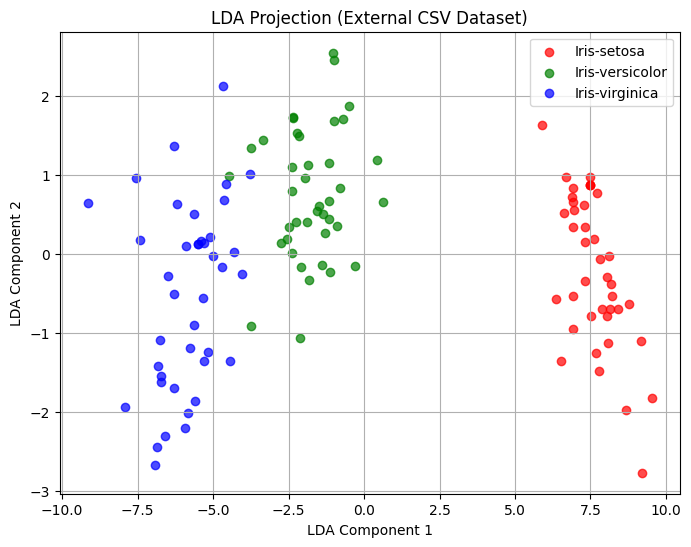

In [268]:
plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue']

for label, color in zip(class_names, colors):
    plt.scatter(
        X_train_lda[y_train == label, 0],
        X_train_lda[y_train == label, 1],
        label=label,
        alpha=0.7,
        color=color
    )

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection (External CSV Dataset)")
plt.legend()
plt.grid(True)
plt.show()